<a href="https://colab.research.google.com/github/Gurekamjot003/ML-practice-projects-/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("ninzaami/loan-predication")
file_path = os.path.join(path, 'train_u6lujuX_CVtuZ9i (1).csv')
loan_data = pd.read_csv(file_path)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
loan_data.value_counts()

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP002936  Male    Yes      0           Graduate      No             3859             3300.0             142.0       180.0             1.0             Rural          Y              1
LP002931  Male    Yes      2           Graduate      Yes            6000             0.0                205.0       240.0             1.0             Semiurban      N              1
LP002928  Male    Yes      0           Graduate      No             3000             3416.0             56.0        180.0             1.0             Semiurban      Y              1
LP002926  Male    Yes      2           Graduate      Yes            2726             0.0                106.0       360.0             0.0             Semiurban      N              1
LP002917  Female  No       0           Not Graduate  No             2165             0.0       

In [18]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
loan_data = loan_data.dropna(how = 'any', axis = 0)


In [21]:
loan_data.shape

(480, 13)

In [22]:
loan_data.replace({"Loan_Status" : {'N' : 0, 'Y' :1}}, inplace = True)
loan_data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_23416\2810890382.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Loan_Status" : {'N' : 0, 'Y' :1}}, inplace = True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [23]:
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [24]:
loan_data.replace(to_replace = '3+', value = 4, inplace = True)
loan_data['Dependents'].value_counts()


Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

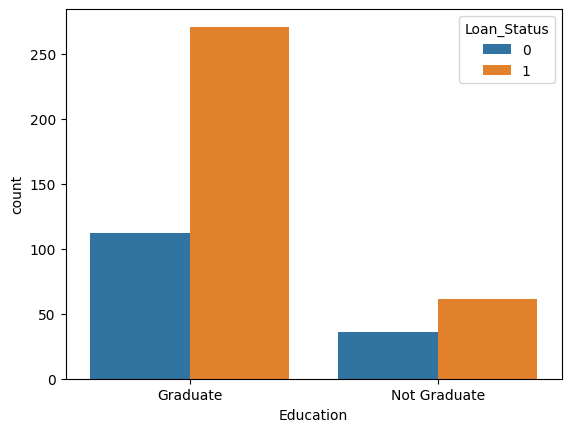

In [25]:
sns.countplot(x = 'Education', data = loan_data, hue = 'Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

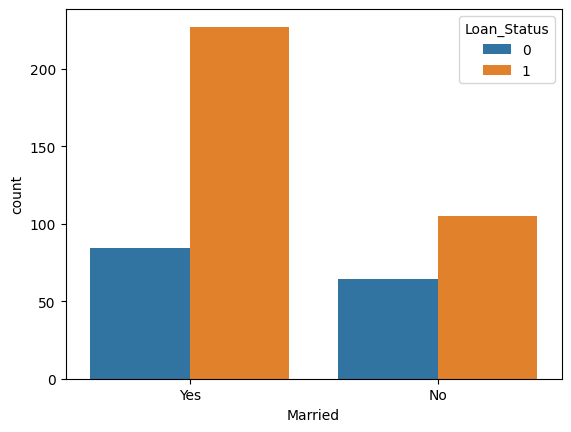

In [26]:
sns.countplot(x = 'Married', data = loan_data, hue = 'Loan_Status')

<Axes: xlabel='Gender', ylabel='count'>

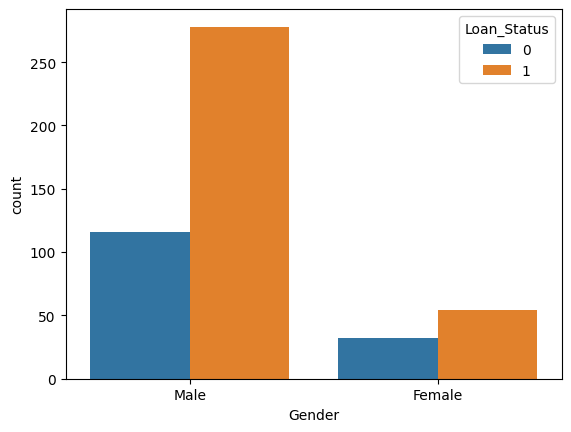

In [27]:
sns.countplot(x = 'Gender', data = loan_data, hue = 'Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

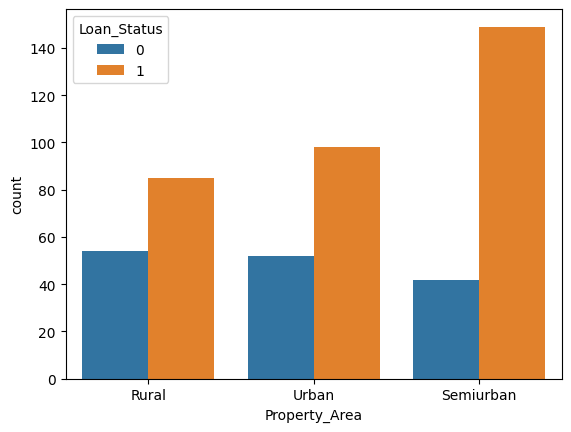

In [28]:
sns.countplot(x = 'Property_Area', data = loan_data, hue = 'Loan_Status')

In [29]:
def label_encode(loan_data):
  loan_data.replace({'Married': {'Yes': 1, 'No':0}, 'Self_Employed': {'Yes': 1, 'No':0},'Loan_status': {'Y': 1, 'N':0}, 'Education': {'Graduate': 1, 'Not Graduate':0}, 'Gender': {'Male': 1, 'Female':0}, 'Property_Area': {'Rural': 2, 'Urban': 1, 'Semiurban':0}}, inplace=True)
  loan_data['Dependents'].replace(to_replace = '3+', value = 4, inplace = True)
  return loan_data

In [30]:
loan_data_preprocessed = label_encode(loan_data)
loan_data_preprocessed.head()

C:\Users\user\AppData\Local\Temp\ipykernel_23416\2955145991.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({'Married': {'Yes': 1, 'No':0}, 'Self_Employed': {'Yes': 1, 'No':0},'Loan_status': {'Y': 1, 'N':0}, 'Education': {'Graduate': 1, 'Not Graduate':0}, 'Gender': {'Male': 1, 'Female':0}, 'Property_Area': {'Rural': 2, 'Urban': 1, 'Semiurban':0}}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_23416\2955145991.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [31]:
X = loan_data_preprocessed.drop(columns=['Loan_Status', 'Loan_ID'], axis = 1)
Y = loan_data_preprocessed['Loan_Status']
print(X, Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [33]:
classifier = svm.SVC(kernel='linear')

In [34]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [35]:
train_data_prediction = classifier.predict(X_train)
train_data_accuracy = accuracy_score(train_data_prediction, Y_train)
print(train_data_accuracy)


0.7615740740740741


In [36]:
test_data_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(test_data_prediction, Y_test)
print(test_data_accuracy)

0.75


Predictive System

In [37]:
import random

In [42]:
data = pd.read_csv(file_path)

In [43]:
index = random.randint(0, X.shape[0])
print(index)
# Select the row as a DataFrame using double brackets [[]]
input_data = X.iloc[[index]]
print(input_data)
print()
prediction = classifier.predict(input_data)
print(prediction)
if(prediction == 0):
  print("not approved")
else:
  print("approved")
if(prediction == Y[index]):
  print("The prediction was right")
else:
  print("The prediction was wrong")

208
     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
265       1        0          0          1              0             4095   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
265             3447.0       151.0             360.0             1.0   

     Property_Area  
265              2  

[1]
approved
The prediction was right
